### References
- [FACIAL RECOGNITION WITH A RESTRICTED BOLTZMANN MACHINE](https://www.gregcondit.com/projects/rbm)

The results are not as promising as in the reference. The images are not of gray scale, but RGB.

In [20]:
import numpy as np
import os
from skimage.io import imread_collection
from skimage.transform import resize

imgs = imread_collection('../data/yalefaces/subject*')
imgs = [resize(x,(77,65), mode='constant', anti_aliasing=False) for x in imgs]
flatImgs = [x.flatten() for x in imgs]

In [27]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

rbm = BernoulliRBM(learning_rate=.01, n_iter=20, n_components=150)
logistic = LogisticRegression(solver='lbfgs', 
                 max_iter=10000,C=6000, multi_class='multinomial')

#Combine the two into a Pipeline
rbm_features_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [28]:
#Create a target variable: an ID between 1 and 15 for each of the 15 subjects
Y = [[id for pose in range(1,12)] for id in range(1,16)]
#Flatten the 'list of lists' into a 2D list
Y = [num for sublist in Y for num in sublist]

rbm_features_classifier.fit(flatImgs, Y)

Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.01, n_components=150, n_iter=30)),
                ('logistic',
                 LogisticRegression(C=6000, max_iter=10000,
                                    multi_class='multinomial'))])

In [29]:
Y_pred = rbm_features_classifier.predict(flatImgs)

from sklearn import metrics
metrics.classification_report(Y, Y_pred)

/Users/yuyang/opt/anaconda3/envs/learnml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuyang/opt/anaconda3/envs/learnml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuyang/opt/anaconda3/envs/learnml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        11\n           2       0.25      0.09      0.13        11\n           3       0.20      0.09      0.13        11\n           4       0.00      0.00      0.00        11\n           5       0.00      0.00      0.00        11\n           6       0.67      0.73      0.70        11\n           7       0.00      0.00      0.00        11\n           8       0.00      0.00      0.00        11\n           9       0.00      0.00      0.00        11\n          10       0.08      0.73      0.14        11\n          11       0.17      0.09      0.12        11\n          12       0.60      0.27      0.37        11\n          13       0.00      0.00      0.00        11\n          14       0.00      0.00      0.00        11\n          15       0.00      0.00      0.00        11\n\n    accuracy                           0.13       165\n   macro avg       0.13      0.13      0.11       165\nweigh

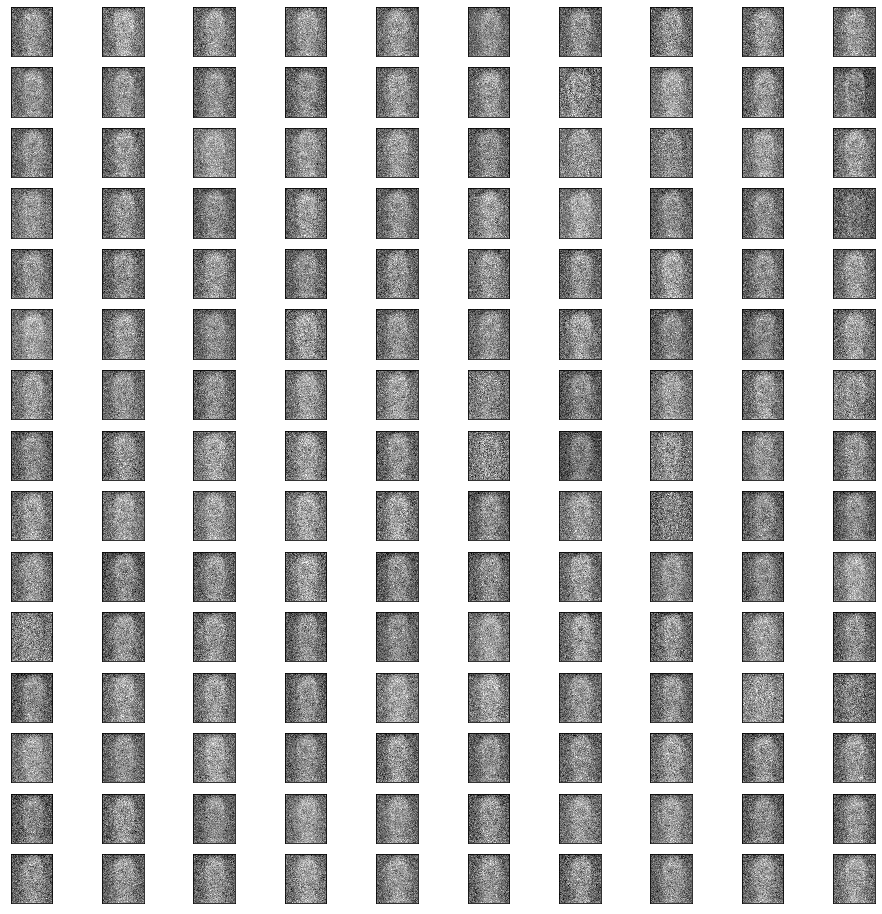

In [30]:

import matplotlib.pyplot as plt
from skimage.io import imshow

plt.figure(figsize=(15, 15))
for i, comp in enumerate(rbm.components_[:150]):
    plt.subplot(15, 10, i + 1)
    plt.imshow(comp.reshape((77, 65)), cmap=plt.cm.gray_r,
        interpolation='nearest')    
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

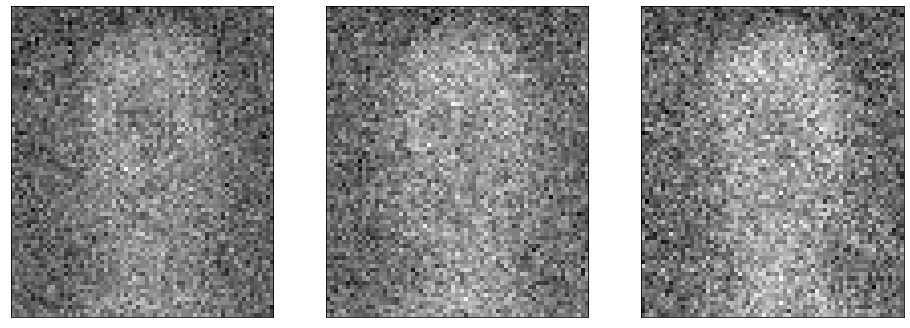

In [31]:
# Selected features for closer examination
toShow = [104,116,84]

plt.figure(figsize=(16, 10))
for i, comp in enumerate(toShow):
    plt.subplot(1,3,i+1)
    plt.imshow(rbm.components_[comp].reshape((77, 65)), cmap=plt.cm.gray_r,
        interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()